In [5]:
import zipfile
import os

# Unzipping the dataset
zip_file_path = r'C:\Users\simra\OneDrive\Documents\Desktop\educational_attainment_supplementary_data.zip'
extract_dir = r'C:\Users\simra\OneDrive\Documents\Desktop\educational_attainment_supplementary_data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)



Files extracted to: C:\Users\simra\OneDrive\Documents\Desktop\educational_attainment_supplementary_data


In [6]:
import pandas as pd

# List all files in the extracted directory
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

# Load the dataset (assuming the main dataset is the first CSV file)
main_csv_file = os.path.join(extract_dir, extracted_files[0])
df = pd.read_csv(main_csv_file)
df.head()


Extracted files: ['cwurData.csv', 'educational_attainment_supplementary_data.csv', 'education_expenditure_supplementary_data.csv', 'school_and_country_table.csv', 'shanghaiData.csv']


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [28]:
#last ten universities
df.tail(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2190,991,Xidian University,China,81,367,542,218,830,974,812,984.0,434,44.03,2015
2191,992,Federal University of Bahia,Brazil,17,367,540,218,962,865,645,969.0,774,44.03,2015
2192,993,Southwest Jiaotong University,China,82,367,327,218,937,962,812,998.0,861,44.03,2015
2193,994,Ryerson University,Canada,33,367,567,218,811,969,511,975.0,756,44.03,2015
2194,995,King Abdulaziz University,Saudi Arabia,4,367,449,218,595,430,645,994.0,839,44.03,2015
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [17]:
# Display column names to identify the target column
print("Column Names:")
print(df.columns)


Column Names:
Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information
print("Basic Information:")
df.info()



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240

In [30]:
# Check the majority country by counting the number of universities from each country
country_counts = df['country'].value_counts()

# Display the counts of universities per country
print("Number of universities per country:")
print(country_counts)

# Find the country with the most universities
majority_country = country_counts.idxmax()
majority_count = country_counts.max()

print(f"\nThe country with the majority of universities is: {majority_country} with {majority_count} universities.")


Number of universities per country:
country
USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
Canada                   72
South Korea              72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Finland                  20
Turkey                   20
Belgium                  20
Poland                   18
Iran                     16
Ireland                  16
Portugal                 14
Greece                   14
Hong Kong                12
Norway                   12
New Zealand              12
Hungary                  12
Denmark                  12
South Africa             10
Czech Republic           10
Russ

In [29]:
# Check if there are any universities from India in the dataset
india_universities = df[df['country'] == 'India']

# Display the universities from India
if not india_universities.empty:
    print(f"Universities from India found:\n{india_universities}")
else:
    print("No universities from India found in the dataset.")


Universities from India found:
      world_rank                                        institution country  \
527          328               Indian Institute of Technology Delhi   India   
635          436                                University of Delhi   India   
700          501                        Indian Institute of Science   India   
734          535              Indian Institute of Technology Bombay   India   
742          543                                  Panjab University   India   
768          569              Indian Institute of Technology Kanpur   India   
773          574           Indian Institute of Technology Kharagpur   India   
775          576              Indian Institute of Technology Madras   India   
791          592             Tata Institute of Fundamental Research   India   
810          611             Indian Institute of Technology Roorkee   India   
866          667                           Banaras Hindu University   India   
976          777  Jaw

In [19]:
# Replace 'world_rank' with the actual name of your target column
target_column_name = 'world_rank'

# Define features and target using the correct column name
if target_column_name in df.columns:
    X = df.drop(target_column_name, axis=1)
    y = df[target_column_name]
else:
    raise KeyError(f"Column '{target_column_name}' not found in the DataFrame")


In [22]:
# Replace 'world_rank' with the actual name of your target column
target_column_name = 'world_rank'

# Define features and target using the correct column name
if target_column_name in df.columns:
    X = df.drop(target_column_name, axis=1)
    y = df[target_column_name]
else:
    raise KeyError(f"Column '{target_column_name}' not found in the DataFrame")


In [20]:
# Display basic information
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240

In [9]:
# Display basic statistics
print("\nBasic Statistics:")
df.describe()




Basic Statistics:


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64


C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


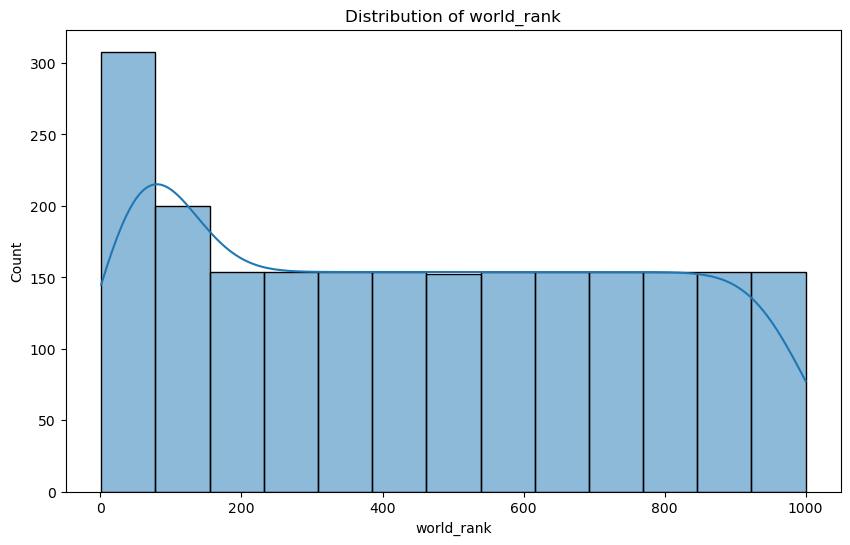

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


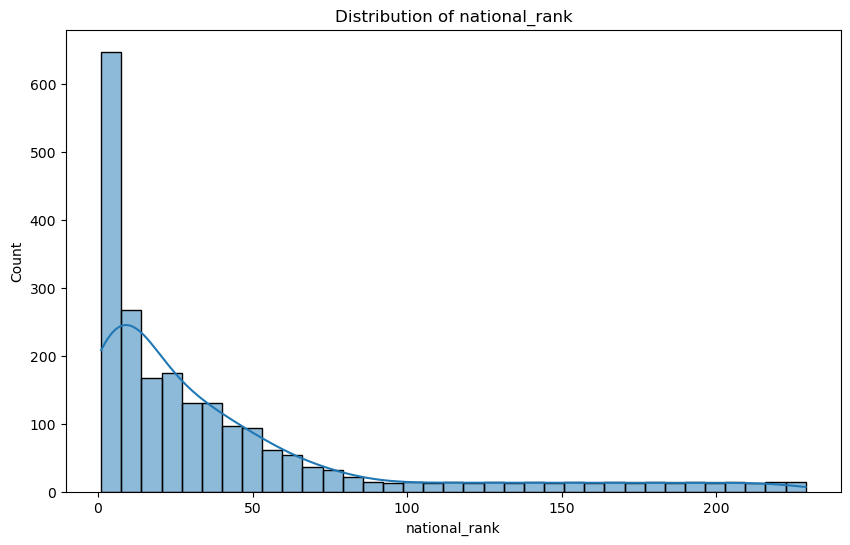

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


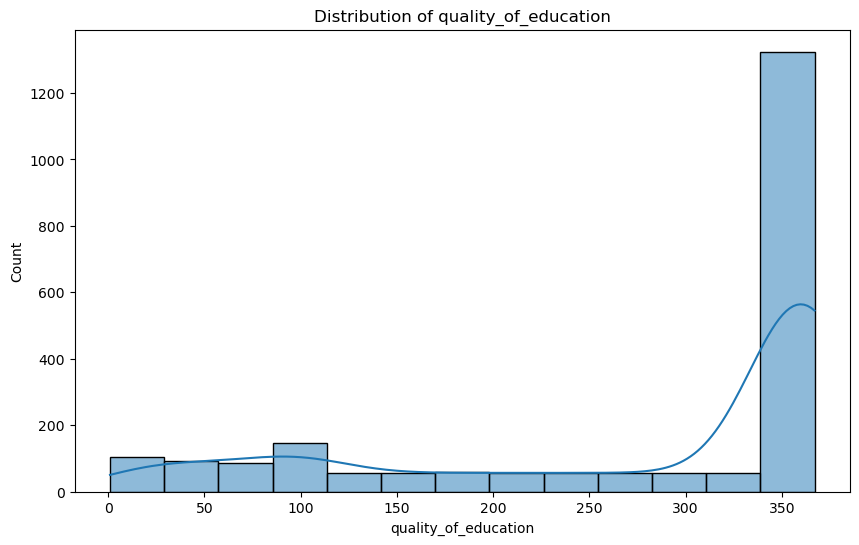

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


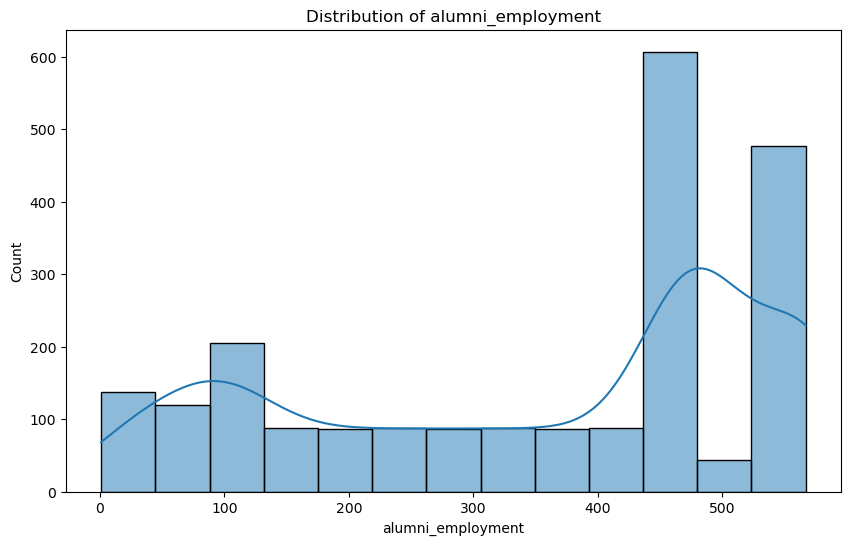

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


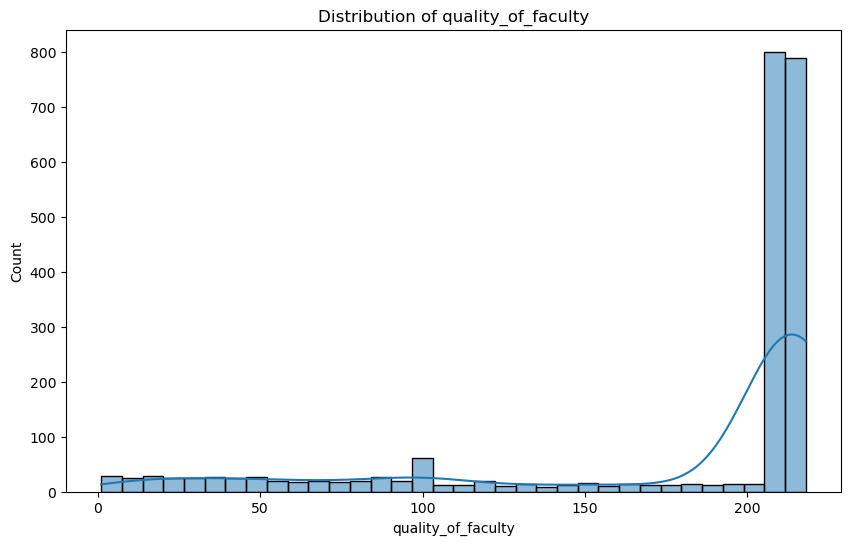

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


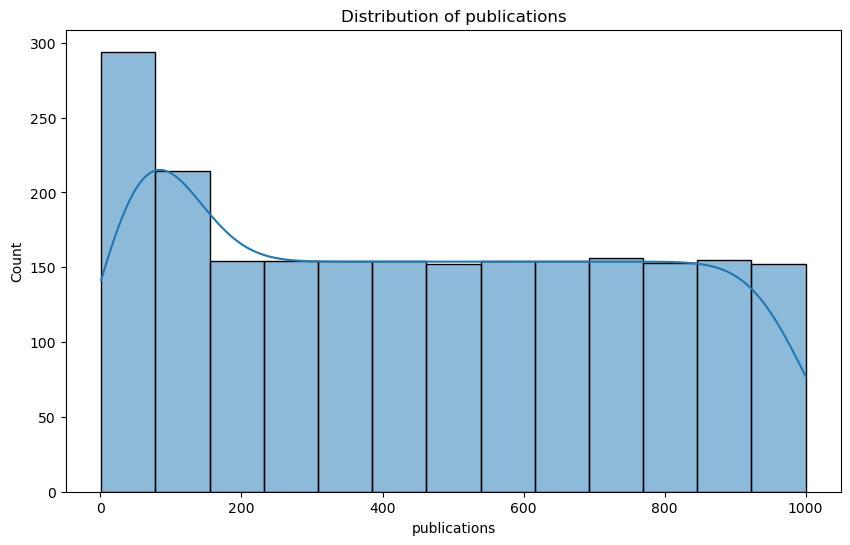

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


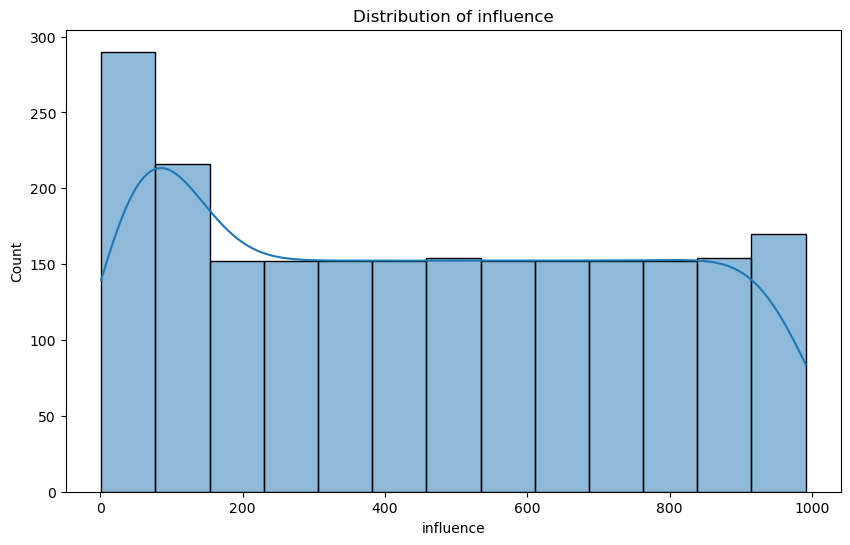

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


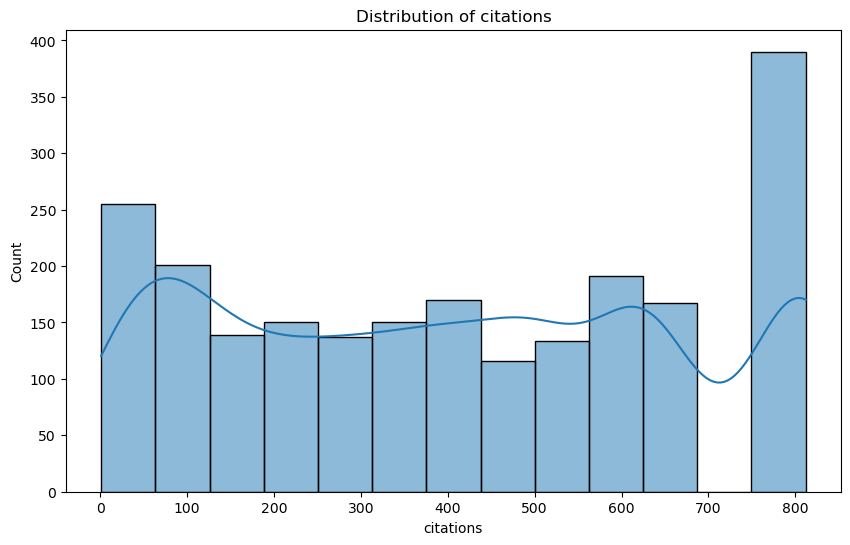

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


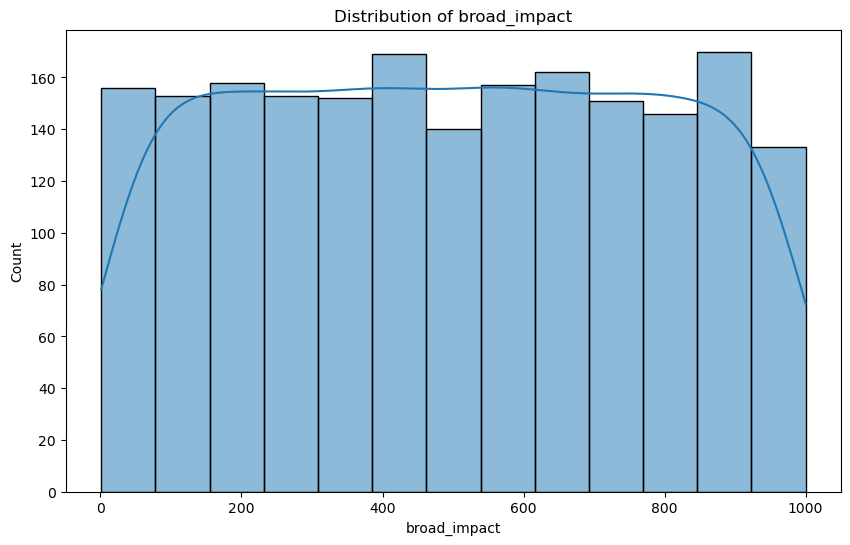

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


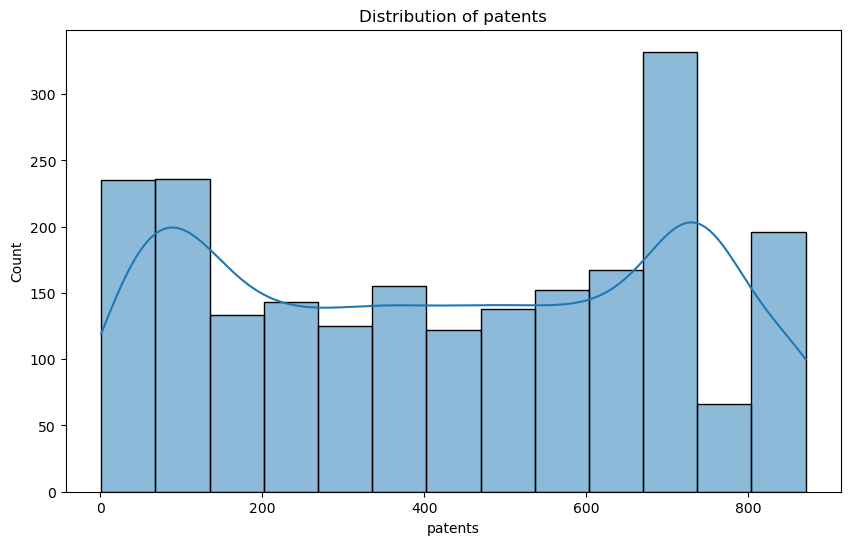

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


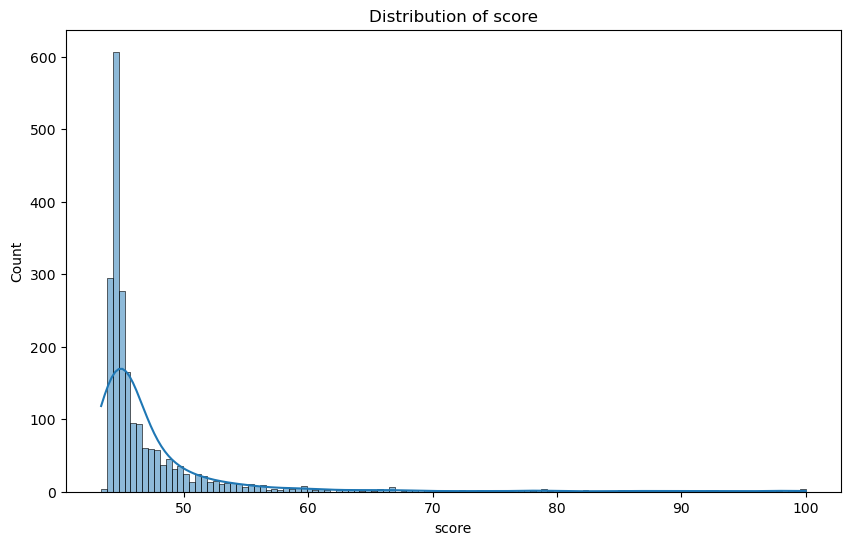

C:\Users\simra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


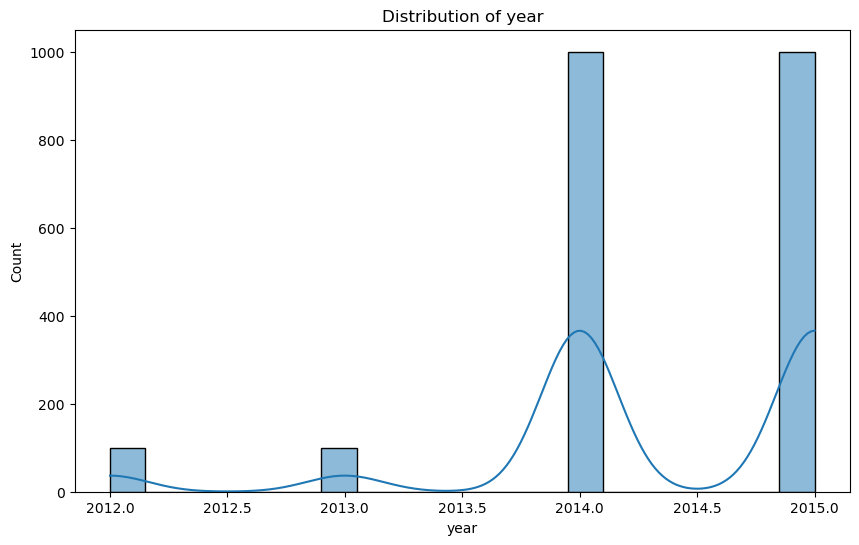

In [11]:
# Plotting distributions of numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


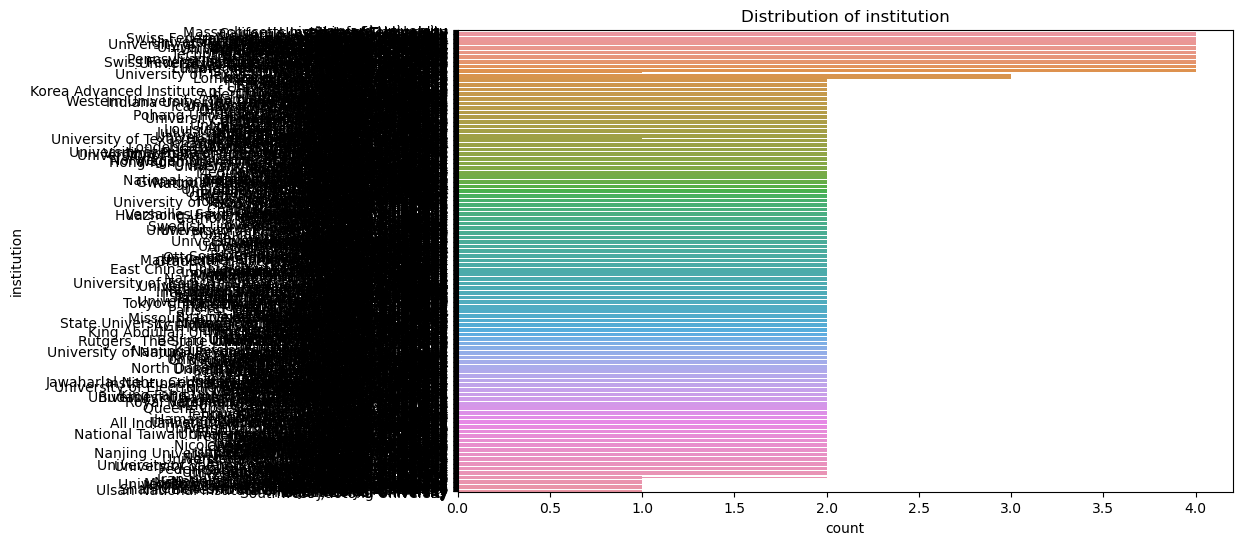

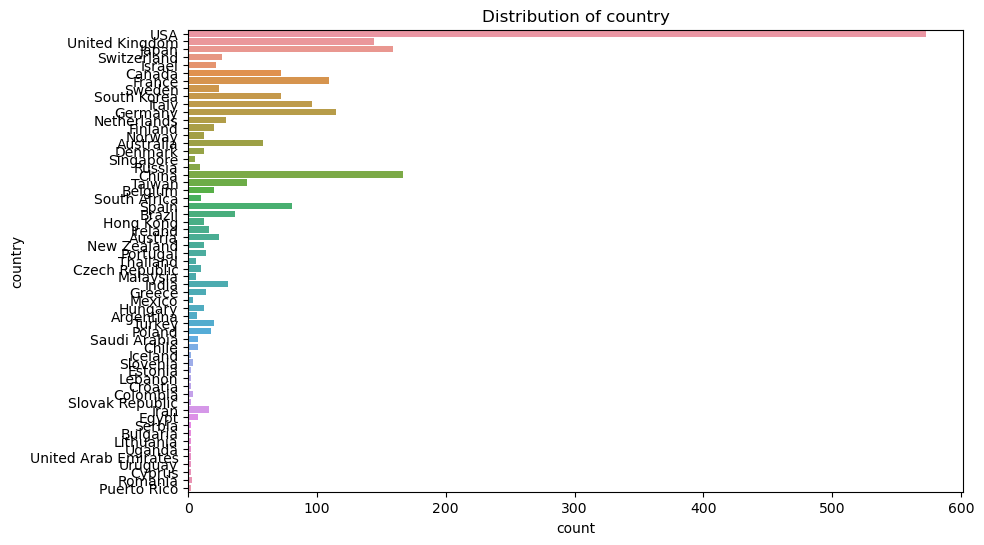

In [12]:

# Plotting distributions of categorical features
cat_features = df.select_dtypes(include=['object']).columns
for col in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


Extracted files: ['cwurData.csv', 'educational_attainment_supplementary_data.csv', 'education_expenditure_supplementary_data.csv', 'school_and_country_table.csv', 'shanghaiData.csv']


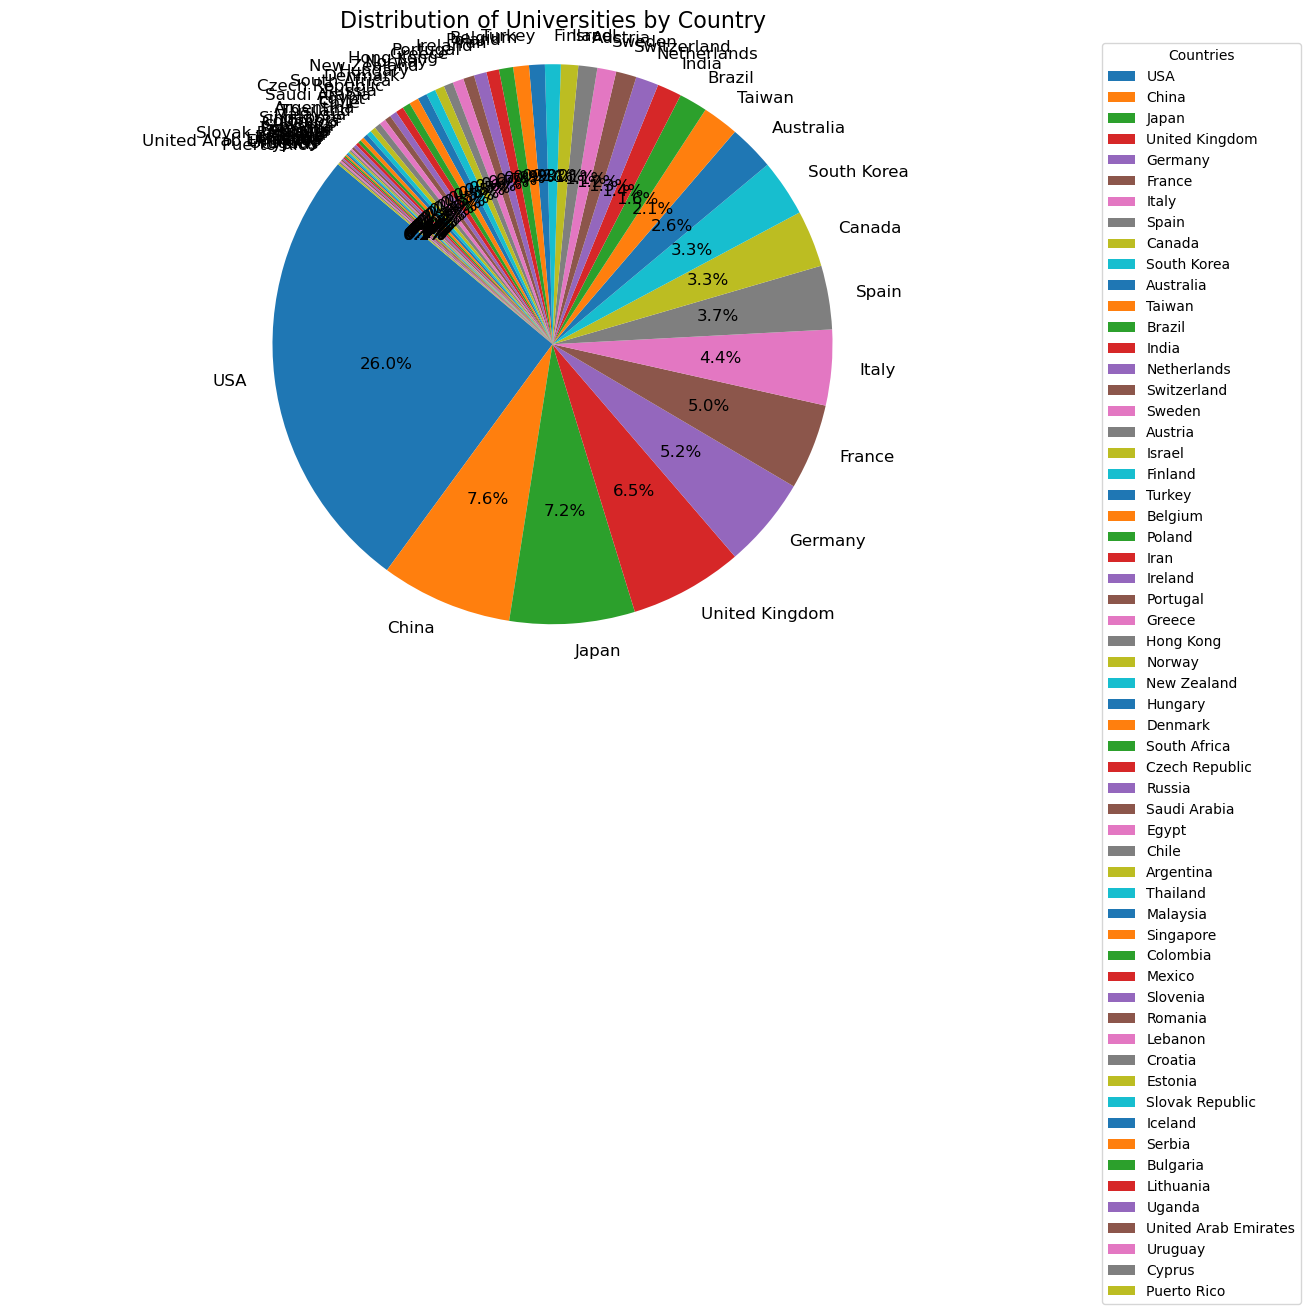

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import os

# Define the file paths
zip_file_path = r'C:\Users\simra\OneDrive\Documents\Desktop\educational_attainment_supplementary_data.zip'
extract_dir = r'C:\Users\simra\OneDrive\Documents\Desktop\educational_attainment_supplementary_data'

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List all files in the extracted directory
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

# Load the dataset (assuming the main dataset is the first CSV file)
main_csv_file = os.path.join(extract_dir, extracted_files[0])
df = pd.read_csv(main_csv_file)
df.head()

# Count the number of universities per country
country_counts = df['country'].value_counts()

# Plot a pie chart with improved clarity
plt.figure(figsize=(14, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Distribution of Universities by Country', fontsize=16)
plt.legend(country_counts.index, title="Countries", bbox_to_anchor=(1, 1), loc="upper left")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()





In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [21]:
# Preprocessing for numerical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])



In [23]:
# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [24]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [25]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data split done.")


Training and testing data split done.


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['national_rank', 'quality_of_education', 'alumni_employment',
       'quality_of_faculty', 'publications', 'influence', 'citations',
       'broad_impact', 'patents', 'score', 'year'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['institution', 'country'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [27]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         0
          24       1.00      0.50      0.67         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
    

C:\Users\simra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\Lib\site-packages\sklearn\metrics\_cla